# ASSIGNMENT2 Encyclopaedia Britannica
## xue feng s1919871
## Description
This dataset covers almost one hundred years of Encyclopaedia Britannica – the first eight editions of the text. The Britannica set the standard for modern encyclopedias and is sometimes seen as an enduring product of the Scottish Enlightenment. Published in Edinburgh, these volumes were a compendium of current and practical knowledge made relatively affordable for purchase.

The Britannica was first issued in Edinburgh in 100 weekly parts (forming 3 volumes) from 1768 to 1771 and illustrated with 160 copperplate engravings. Subsequent editions of the Britannica expanded the content: the second edition was published in 10 volumes (1777-1784); the third in 18 volumes (1788-1797). It offers exciting new opportunities to explore and trace the representation of knowledge over time.


### The search topic :
- How do the size of words changed over time( from version to version)?
  * words
  * the class of words(Speech Tagging with NLTK)(e.g.:JJ  adjective 'big')
- Are the numbers of words keeping increasing?
- Are the numbers of words(Classified by initials) changes from version to version？

This analysis covers the words in encyclopaedia britannica from version 2 to version 4.

- The general type of data is textual data.
- The total raw data is around 40gb.
  The dataframe that I cleaned has 14229,15390,16577,16558 rows separately(from version 2 to version 5)
  it has four columns:
    content: representing these words' contents
    page: which page it is in
    booknum: which volumne it is in
    (P.S.: After analyzing I added some another dataframe which will be described before creating them.)


## About the file road
I add the road in my laptop in this:


D:\ed di\ds4d\nls-data-encyclopaediaBritannica


so I think this file might be in "...\nls-data-encyclopaediaBritannica"


plus,I changed all version2 name to add a "-3" suffix ,  if running in raw file, delete the "-3" of all the files)

## Download
* Download pyecharts.Use 'pip install pyecharts -U'
* Download palettable. Use 'pip install palettable'
* Download wordcloud. Use 'pip install palettable'


In [162]:
!pip install pyecharts -U
!pip install palettable
!pip install wordcloud

### Import the necessary package

In [2]:
import seaborn as sns
import re
import pandas as pd
import matplotlib.pyplot as plt
from palettable.colorbrewer.qualitative import Pastel1_7
#colour package
try:
  import xml.etree.cElementTree as et
except ImportError:
  import xml.etree.ElementTree as et
import glob
import nltk
#natural language processing package
from pyecharts.charts import Bar
from pyecharts import options as opts
#import necessary package

Add the array with the filename of different version.

In [3]:
editionNumberSecond = [144850370, 144850373, 144850374, 144850375, 144850376, 144850377, 144850378, 144850379, 190273289, 190273290]
editionNumberThird1 = [190273291, 149977338, 149977873, 149978642, 149979156, 149979622, 149981189, 149981670, 149982181, 149982692, 149983206, 190273372, 191253798, 192200061, 191253799, 191319917, 191253800, 191253817]
editionNumberThird2 = [191253801, 194167545, 191253802, 193322691, 191253822, 191253803, 192547778, 192547779, 191320009, 191253804, 191253805, 191253823, 191253835, 191253806, 191253824, 191253814, 193109107, 191679021]
editionNumberFourth = [191253818, 191253819, 192545783, 192545784, 191809865, 191809866, 191253825, 191253826, 191320556, 191320557, 192547776, 192547777, 192692191, 192692190, 191320560, 191320561, 193109110, 193109111, 192692192, 192692193, 191679019, 191679020, 192545785, 192545786, 191678902, 191678903, 191253838, 191253839, 191253836, 191253837, 191689060, 191689061, 191320559, 191320558, 192692194, 192692195, 193108316, 193108317, 191678900, 191678901]
editionNumberFifth = [192016229, 191689063, 193108318, 191679033, 192984254, 192984255, 191678897, 191678898, 193109108, 193109109, 192547785, 192200901, 192200898, 192200900, 192200897, 192692638, 191689062, 192984256, 192200899, 191678899]
editionNumberSixth = [192547781, 192015835, 193696080, 192200662, 192692756, 192200322, 192015838, 192015836, 192547782, 191679036, 192984257, 191689064, 192200323, 191689065, 192015837, 192547783, 192547784, 192015834, 193057497, 193696081]
editionNumberSeventh = [192984259, 193057500, 193108322, 193696083, 193322690, 193819043, 193322688, 193696084, 193469090, 193638940, 192693199, 193108323, 193322689, 193819044, 194474782, 193469091, 193469092, 193057501, 193913444, 193819045]
editionNumberEighth = [193322698, 193696085, 193696086, 193108324, 193109113, 193109114, 193108325, 193322700, 193109115, 193469392, 193696087, 193916150, 193696088, 193592632, 193322699, 193819046, 193108326, 193322701, 193469393, 193819047]

Catch the words of Encyclopaedia Britennica 

In [3]:
versionwords=[]
#create an empty list to save the data from xml file.(ps: this filename has been changed by myself, if running in raw file, delete the "-3" of all the files)
version2File=glob.glob(r"144850370-3/alto/*.xml")+glob.glob(r"144850373-3/alto/*.xml")+glob.glob(r"144850374-3/alto/*.xml")+glob.glob(r"144850375-3/alto/*.xml")+glob.glob(r"144850376-3/alto/*.xml")+glob.glob(r"144850377-3/alto/*.xml")+glob.glob(r"144850378-3/alto/*.xml")+glob.glob(r"144850379-3/alto/*.xml")+glob.glob(r"190273289-3/alto/*.xml")+glob.glob(r"190273290-3/alto/*.xml")
#save all xml filename in the file.
for filename in version2File:
    volumn=0#initialize volumn
    tree2 = et.parse(filename)
    root1 = tree2.getroot()
    attr = root1.attrib
    tagtext = '{http://www.loc.gov/standards/alto/v3/alto.xsd}'
    #get the xml path
    path = tagtext+'Layout/'+tagtext+'Page/'+tagtext+'PrintSpace/'+tagtext+'TextLine/'+tagtext+'String'
    pathforno=tagtext+'Description/'+tagtext+'sourceImageInformation/'+tagtext+'String'
    content=0
    newcontent=0
    #define which volumn the file is. (ps: this filename has been changed by myself, if running in raw file, delete the "-3" of all the files)
    if re.match("^144850370-3*[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=1
    elif re.match("^144850373-3*[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=2
    elif re.match("^144850374-3*[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=3
    elif re.match("^144850375-3*[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=4
    elif re.match("^144850376-3*[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=5
    elif re.match("^144850377-3*[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=6
    elif re.match("^144850378-3*[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=7
    elif re.match("^144850379-3*[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=8
    elif re.match("^190273289-3*[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=9
    elif re.match("^190273290-3*[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=10
    
    for a in tree2.iterfind(path):
        content = a.attrib['CONTENT']#Get the text content
        if ((content.isupper()) & (len(content)>1)):        
            if re.match("^[A-Z]([A-Za-z]{0,40})*\,$",a.attrib['CONTENT']):
                #match the word which has a "," at the end and Initial capitalization
                versionwords.append({'CONTENT':str(a.attrib['CONTENT'].strip(',')),'PAGE':str(re.findall(r"p\d{0,3}",a.attrib['ID'])).strip('[]\''),'BOOKNUM':volumn})
                #get the words[content] the page of the words [content]and the volumn of the words [bookno]
                #remove the "," and get which page it is
    dfversion2 = pd.DataFrame(versionwords,columns=["CONTENT","PAGE","BOOKNUM"])
dfversion2.sort_values(by=['CONTENT']) #sorting rows by content 
dfversion2 = dfversion2.drop_duplicates(subset=['CONTENT'], keep='first', inplace=False).reset_index(drop=True)
#drop the duplicates words and get a basic dataframe with words in version2

This above is the opration for searching all the words in xml file and save itself and its page and its volumn into a dataframe which can be used for analyzing 

In [4]:
dfversion2

CONTENT  PAGE  BOOKNUM
0                  OR    p7        1
1                ARTS    p7        1
2                   S    p7        1
3               WHICH    p7        1
4             SYSTEMS    p7        1
5             HISTORY    p7        1
6              THEORY    p7        1
7            PRACTICE    p7        1
8           KNOWLEDGE    p7        1
9      ECCLESIASTICAL    p7        1
10              CIVIL    p7        1
11           MILITARY    p7        1
12         COMMERCIAL    p7        1
13          COUNTRIES    p7        1
14             CITIES    p7        1
15          MOUNTAINS    p7        1
16               SEAS    p7        1
17             RIVERS    p7        1
18            EMPIRES    p7        1
19           KINGDOMS    p7        1
20            AUTHORS    p7        1
21       DICTIONARIES    p7        1
22       TRANSACTIONS    p7        1
23           JOURNALS    p7        1
24            MEMOIRS    p7        1
25          MATERIALS    p7        1
26            DISCANT    p7        1
27             GORDON    p7        1
28               BELL    p7        1
29            DICKSON    p7        1
...               ...   ...      ...
15578          RAGUSA  p121       10
15579    SANDEMANIANS  p122       10
15580          SAPOTA  p122       10
15581       SASSAFRAS  p122       10
15582          SCALDS  p122       10
15583        SCHOONER  p122       10
15584          SJENSE  p122       10
15585        SERPENTS  p122       10
15586          SHELLS  p123       10
15587           SIDUS  p123       10
15588         SIGHING  p123       10
15589         SKATING  p123       10
15590       SPLACHNUM  p123       10
15591          SQUATT  p123       10
15592        STERNWAY  p123       10
15593     SYNCOPATION  p123       10
15594         TAGETES  p123       10
15595          TAVIRA  p124       10
15596      THELIGONUM  p124       10
15597       THEOBROMA  p124       10
15598        TIBERIUS  p124       10
15599        TRIBULUS  p124       10
15600           TRILL  p124       10
15601      TROPJEOLUM  p124       10
15602          TRYING  p124       10
15603        TUBIPORA  p124       10
15604           TYLES  p124       10
15605           VITEX  p124       10
15606           USNEA  p125       10
15607          CCLXIX  p127       10

[15608 rows x 3 columns]

As the table shown above, it has a lot of words that not be the content I want, so I need to clean up the data in the wrong location


## clean the rows by deleting the words which are not in the suitable volume.
 e.g A should not be in the volumn 4-10 in version 2.
 
 This is based on the 'encyclopaediaBritannica-inventory' this csv file of the raw file.

In [165]:
version2=pd.DataFrame(columns=["CONTENT","PAGE","BOOKNUM"])

for m in range(ord("A"),ord("Z")+1):
    #save the data which initial is chr(m)
    #m is the ascii code of A TO Z ,so chr(m) represents capital alpha.
    versiontemp=dfversion2[dfversion2.CONTENT.str.startswith(chr(m))]
    if  m<=66:
        #drop the wrong data
        Dlt=versiontemp[(versiontemp['BOOKNUM']>3)].index
        versiontemp.drop(Dlt,inplace=True)
        version1=versiontemp 
    elif m==67:
        Dlt=versiontemp[((versiontemp['BOOKNUM']>3)|(versiontemp['BOOKNUM']<3))].index
        versiontemp.drop(Dlt,inplace=True)
        version1=versiontemp 
    elif ((m>=68) & (m<=70)):
        Dlt=versiontemp[((versiontemp['BOOKNUM']>4)|(versiontemp['BOOKNUM']<4))].index
        versiontemp.drop(Dlt,inplace=True)
        version1=versiontemp 
    elif ((m>=71) & (m<=74)):
        Dlt=versiontemp[((versiontemp['BOOKNUM']>5)|(versiontemp['BOOKNUM']<5))].index
        versiontemp.drop(Dlt,inplace=True)
        version1=versiontemp 
    elif ((m>=75) & (m<=76)):
        Dlt=versiontemp[((versiontemp['BOOKNUM']>6)|(versiontemp['BOOKNUM']<6))].index
        versiontemp.drop(Dlt,inplace=True)
        version1=versiontemp 
    elif m==77:
        Dlt=versiontemp[(versiontemp['BOOKNUM']==range(1,6))|(versiontemp['BOOKNUM']==range(8,11))].index
        Dlt=versiontemp[((versiontemp['BOOKNUM']>7)|(versiontemp['BOOKNUM']<6))].index
        versiontemp.drop(Dlt,inplace=True)
        version1=versiontemp 
    elif m==78:
        Dlt=versiontemp[((versiontemp['BOOKNUM']>7)|(versiontemp['BOOKNUM']<7))].index
        versiontemp.drop(Dlt,inplace=True)
        version1=versiontemp 
    elif m==79:
        Dlt=versiontemp[((versiontemp['BOOKNUM']>8)|(versiontemp['BOOKNUM']<7))].index
        versiontemp.drop(Dlt,inplace=True)
        version1=versiontemp 
    elif m==80:
        Dlt=versiontemp[((versiontemp['BOOKNUM']>9)|(versiontemp['BOOKNUM']<8))].index
        versiontemp.drop(Dlt,inplace=True)
        version1=versiontemp 
    elif ((m>=81) & (m<=82)):
        Dlt=versiontemp[((versiontemp['BOOKNUM']>9)|(versiontemp['BOOKNUM']<9))].index
        versiontemp.drop(Dlt,inplace=True)
        version1=versiontemp 
    elif ((m>=83) & (m<=95)):
        Dlt=versiontemp[((versiontemp['BOOKNUM']>10)|(versiontemp['BOOKNUM']<10))].index
        versiontemp.drop(Dlt,inplace=True)
        version1=versiontemp
    version2=version2.append(version1,ignore_index=True)
version2#get the version 2 dataframe

CONTENT  PAGE BOOKNUM
0              ARTS    p7       1
1           AUTHORS    p7       1
2       AGRICULTURE   p12       1
3                 A   p15       1
4                AA   p15       1
5              AACH   p15       1
6             AAHUS   p15       1
7               AAM   p15       1
8               AAR   p15       1
9             AARON   p15       1
10               AB   p16       1
11       ABACATUAIA   p16       1
12            ABACH   p16       1
13           ABACOT   p16       1
14         ABACTORS   p16       1
15        ABACTORES   p16       1
16           ABACUS   p17       1
17          ABADDON   p17       1
18           ABADIR   p17       1
19              ABA   p17       1
20            ABAFT   p17       1
21          ABAISED   p17       1
22           ABALAK   p17       1
23     ABALIENATION   p17       1
24      ABALIENATUS   p17       1
25         ABALLABA   p17       1
26            ABANA   p17       1
27           ABANGA   p17       1
28            ABANO   p18       1
29          ABANTES   p18       1
...             ...   ...     ...
14199       ZEALOTS  p104      10
14200         ZEBRA  p104      10
14201     ZECHARIAH  p104      10
14202       ZEDOARY  p104      10
14203          ZELL  p104      10
14204          ZEND  p104      10
14205        ZENITH  p104      10
14206       ZENOBIA  p105      10
14207        ZEPHYR  p105      10
14208      ZEPHYRUS  p105      10
14209          ZEST  p105      10
14210        ZEUGMA  p105      10
14211          ZEUS  p105      10
14212        ZEUXIS  p105      10
14213        ZICLAG  p105      10
14214      ZINZIBER  p105      10
14215          ZION  p105      10
14216          ZIPH  p105      10
14217        ZODIAC  p105      10
14218          ZONE  p105      10
14219      ZOOPHYTE  p105      10
14220       ZOOTOMY  p105      10
14221     ZOROASTER  p105      10
14222       ZOSIMUS  p105      10
14223           ZUG  p105      10
14224        ZURICH  p105      10
14225       ZUTPHEN  p105      10
14226        ZYGOMA  p105      10
14227   ZYGOMATICUS  p105      10
14228   ZYGOPHYLLUM  p105      10

[14229 rows x 3 columns]

## Same operation for version3-5

In [166]:
version2words=[]#create an empty list to save the data from xml file.
version3File=glob.glob(r"190273291/alto/*.xml")+glob.glob(r"149977338/alto/*.xml")+glob.glob(r"149977873/alto/*.xml")+glob.glob(r"149978642/alto/*.xml")+glob.glob(r"149979156/alto/*.xml")+glob.glob(r"149979622/alto/*.xml")+glob.glob(r"149981189/alto/*.xml")+glob.glob(r"149981670/alto/*.xml")+glob.glob(r"149982181/alto/*.xml")+glob.glob(r"149982692/alto/*.xml")+glob.glob(r"149983206/alto/*.xml")+glob.glob(r"190273372/alto/*.xml")+glob.glob(r"191253798/alto/*.xml")+glob.glob(r"192200061/alto/*.xml")+glob.glob(r"191253799/alto/*.xml")+glob.glob(r"191319917/alto/*.xml")+glob.glob(r"191253800/alto/*.xml")+glob.glob(r"191253817/alto/*.xml")
#save all xml filename in the file.
for filename in version3File:
    volumn=0
    tree2 = et.parse(filename)
    root1 = tree2.getroot()
    attr = root1.attrib
    tagtext = '{http://www.loc.gov/standards/alto/v3/alto.xsd}'
    path = tagtext+'Layout/'+tagtext+'Page/'+tagtext+'PrintSpace/'+tagtext+'TextLine/'+tagtext+'String'
    pathforno=tagtext+'Description/'+tagtext+'sourceImageInformation/'+tagtext+'String'
    content=0
    if re.match("^190273291[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=1
    elif re.match("^149977338[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=2
    elif re.match("^149977873[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=3
    elif re.match("^149978642[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=4
    elif re.match("^149979156[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=5
    elif re.match("^149979622[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=6
    elif re.match("^149981189[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=7
    elif re.match("^149981670[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=8
    elif re.match("^149982181[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=9
    elif re.match("^149982692[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=10
    elif re.match("^149983206[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=11
    elif re.match("^190273372[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=12
    elif re.match("^191253798[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=13
    elif re.match("^192200061[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=14
    elif re.match("^191253799[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=15
    elif re.match("^191319917[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=16
    elif re.match("^191253800[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=17
    elif re.match("^191253817[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=18
    for a in tree2.iterfind(path):
        content = a.attrib['CONTENT']#Get the text content
        if ((content.isupper()) & (len(content)>1)):        
            if re.match("^[A-Z]([A-Za-z]{0,40})*\,$",a.attrib['CONTENT']):
                #match the word which has a "," at the end 
                version2words.append({'CONTENT':str(a.attrib['CONTENT'].strip(',')),'PAGE':str(re.findall(r"p\d{0,3}",a.attrib['ID'])).strip('[]\''),'BOOKNUM':volumn})                
    dfversion3 = pd.DataFrame(version2words,columns=["CONTENT","PAGE","BOOKNUM"])
dfversion3.sort_values(by=['CONTENT']) 
dfversion3 = dfversion3.drop_duplicates(subset=['CONTENT'], keep='first', inplace=False).reset_index(drop=True)

In [168]:
#Data cleaning for version 3
version3=pd.DataFrame(columns=["CONTENT","PAGE","BOOKNUM"])
for m in range(ord("A"),ord("Z")+1):
    versiontemp=dfversion3[dfversion3.CONTENT.str.startswith(chr(m))]
    if m ==65:#A
        Dlt=versiontemp[(versiontemp['BOOKNUM']>2)].index
        versiontemp.drop(Dlt,inplace=True)
        version1=versiontemp
    elif  m==66:#B
        Dlt=versiontemp[((versiontemp['BOOKNUM']>3)|(versiontemp['BOOKNUM']==1))].index
        versiontemp.drop(Dlt,inplace=True)
        version1=versiontemp 
    elif m==67:#C
        Dlt=versiontemp[((versiontemp['BOOKNUM']<4)|(versiontemp['BOOKNUM']>5))].index
        versiontemp.drop(Dlt,inplace=True)
        version1=versiontemp
    elif m==68 :#D
        Dlt=versiontemp[((versiontemp['BOOKNUM']<5)|(versiontemp['BOOKNUM']>6))].index
        versiontemp.drop(Dlt,inplace=True)
        version1=versiontemp
    elif m==69:#E
        Dlt=versiontemp[((versiontemp['BOOKNUM']<6)|(versiontemp['BOOKNUM']>7))].index
        versiontemp.drop(Dlt,inplace=True)
        version1=versiontemp
    elif m==70:#F
        Dlt=versiontemp[((versiontemp['BOOKNUM']<7)|(versiontemp['BOOKNUM']>7))].index
        versiontemp.drop(Dlt,inplace=True)
        version1=versiontemp
    elif m==71:#G
        Dlt=versiontemp[((versiontemp['BOOKNUM']<7)|(versiontemp['BOOKNUM']>8))].index
        versiontemp.drop(Dlt,inplace=True)
        version1=versiontemp
    elif m==72:#H
        Dlt=versiontemp[((versiontemp['BOOKNUM']<8)|(versiontemp['BOOKNUM']>9))].index
        versiontemp.drop(Dlt,inplace=True)
        version1=versiontemp
    elif ((m>=73)&(m<=75)):#IJK
        Dlt=versiontemp[((versiontemp['BOOKNUM']<9)|(versiontemp['BOOKNUM']>9))].index
        versiontemp.drop(Dlt,inplace=True)
        version1=versiontemp
    elif m==76:#L
        Dlt=versiontemp[((versiontemp['BOOKNUM']<9)|(versiontemp['BOOKNUM']>10))].index
        versiontemp.drop(Dlt,inplace=True)
        version1=versiontemp
    elif m==77:#M
        Dlt=versiontemp[((versiontemp['BOOKNUM']<10)|(versiontemp['BOOKNUM']>12))].index
        versiontemp.drop(Dlt,inplace=True)
        version1=versiontemp
    elif m==78:#N
        Dlt=versiontemp[((versiontemp['BOOKNUM']<12)|(versiontemp['BOOKNUM']>13))].index
        versiontemp.drop(Dlt,inplace=True)
        version1=versiontemp
    elif m==79:#O
        Dlt=versiontemp[((versiontemp['BOOKNUM']<13)|(versiontemp['BOOKNUM']<13))].index
        versiontemp.drop(Dlt,inplace=True)
        version1=versiontemp
    elif m==80:#P
        Dlt=versiontemp[((versiontemp['BOOKNUM']<13)|(versiontemp['BOOKNUM']>15))].index
        versiontemp.drop(Dlt,inplace=True)
        version1=versiontemp
    elif m==80:#Q
        Dlt=versiontemp[((versiontemp['BOOKNUM']<15)|(versiontemp['BOOKNUM']>15))].index
        versiontemp.drop(Dlt,inplace=True)
        version1=versiontemp
    elif m==81:#R
        Dlt=versiontemp[((versiontemp['BOOKNUM']<15)|(versiontemp['BOOKNUM']>16))].index
        versiontemp.drop(Dlt,inplace=True)
        version1=versiontemp
    elif m==82:#S
        Dlt=versiontemp[(versiontemp['BOOKNUM']<16)].index
        versiontemp.drop(Dlt,inplace=True)
        version1=versiontemp
    elif ((m>=83)&(m<=95)):#O
        Dlt=versiontemp[(versiontemp['BOOKNUM']<18)].index
        versiontemp.drop(Dlt,inplace=True)
        version1=versiontemp
    version3=version3.append(version1,ignore_index=True)
version3#get the version 3 dataframe

CONTENT  PAGE BOOKNUM
0              ARTS   p11       1
1                 A   p17       1
2          AEROLOGY   p25       1
3       AEROSTATION   p25       1
4                AA   p28       1
5              AACH   p28       1
6             AAHUS   p28       1
7               AAM   p28       1
8                AM   p28       1
9               AAR   p28       1
10            AARON   p28       1
11          AERTGEN   p29       1
12               AB   p29       1
13              ABA   p29       1
14       ABACATUAIA   p29       1
15            ABACH   p29       1
16        ABACINARE   p29       1
17       ABBACINARE   p29       1
18           ABACGT   p29       1
19           ABACOT   p30       1
20         ABACTORS   p30       1
21        AEACTORES   p30       1
22           ABACUS   p30       1
23          ABADDON   p30       1
24           ABADIR   p30       1
25            ABAFT   p30       1
26         ABAISSED   p30       1
27     ABALIENATION   p30       1
28         ABALLABA   p30       1
29          APPLEBY   p30       1
...             ...   ...     ...
15360          ZEND  p105      18
15361        ZENITH  p105      18
15362       ZENOBIA  p105      18
15363     ZEPHANIAH  p105      18
15364       ZEPPIYR  p105      18
15365     ZEPPIYRUS  p105      18
15366         ZERTA  p105      18
15367          ZEST  p105      18
15368        ZEUXIS  p105      18
15369        ZEUGMA  p105      18
15370          ZEUS  p105      18
15371        ZICLAG  p106      18
15372         ZIVTB  p106      18
15373          ZINC  p106      18
15374        ZINNIA  p106      18
15375      ZINZIBER  p106      18
15376          ZION  p106      18
15377          ZIPH  p106      18
15378       ZIZANIA  p106      18
15379        ZODIAC  p106      18
15380          ZONE  p106      18
15381       ZOOLOGY  p106      18
15382       ZOOTOMY  p106      18
15383       ZORILEE  p106      18
15384       ZQSTERA  p106      18
15385       ZOSJMUS  p106      18
15386           ZUG  p106      18
15387        ZURICH  p106      18
15388        ZYGOMA  p106      18
15389   ZYGOPHYLLUM  p106      18

[15390 rows x 3 columns]

# Version4

In [169]:
version2words=[]
#create an empty list to save the data from xml file.
version4FileSum=[]
#for version 4 and 5 ,the volumns are too much ,so I used for loop to save all the files in versionfilesum this list.
for a in editionNumberFourth:
    version4File1=glob.glob(str(a)+"/alto/*.xml")
    for b in version4File1:
        version4FileSum.append(b)
#save all xml filename in the file.
for filename in version4FileSum:
    volumn=0
    tree2 = et.parse(filename)
    root1 = tree2.getroot()
    attr = root1.attrib
    tagtext = '{http://www.loc.gov/standards/alto/v3/alto.xsd}'
    path = tagtext+'Layout/'+tagtext+'Page/'+tagtext+'PrintSpace/'+tagtext+'TextLine/'+tagtext+'String'
    pathforno=tagtext+'Description/'+tagtext+'sourceImageInformation/'+tagtext+'String'
    content=0
    newcontent=0
    if (re.match("^19125381[8-9][0-9\.a-z\\\/]{0,40}$",filename)):
        volumn=1
    elif re.match("^19254578[3-4][0-9\.a-z\\\/]{0,40}$",filename):
        volumn=2
    elif re.match("^19180986[5-6][0-9\.a-z\\\/]{0,40}$",filename):
        volumn=3
    elif re.match("^19125382[5-6][0-9\.a-z\\\/]{0,40}$",filename):
        volumn=4
    elif re.match("^19132055[6-7][0-9\.a-z\\\/]{0,40}$",filename):
        volumn=5
    elif re.match("^19254777[6-7][0-9\.a-z\\\/]{0,40}$",filename):
        volumn=6
    elif re.match("^19269219[0-1][0-9\.a-z\\\/]{0,40}$",filename):
        volumn=7
    elif re.match("^19132056[0-1][0-9\.a-z\\\/]{0,40}$",filename):
        volumn=8
    elif re.match("^19310911[0-1][0-9\.a-z\\\/]{0,40}$",filename):
        volumn=9
    elif re.match("^19269219[2-3][0-9\.a-z\\\/]{0,40}$",filename):
        volumn=10
    elif re.match("^1916790([1][9]|[2][0])[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=11
    elif re.match("^19254578[5-6][0-9\.a-z\\\/]{0,40}$",filename):
        volumn=12
    elif re.match("^19167890[2-3][0-9\.a-z\\\/]{0,40}$",filename):
        volumn=13
    elif re.match("^19125383[8-9][0-9\.a-z\\\/]{0,40}$",filename):
        volumn=14
    elif re.match("^19125383[6-7][0-9\.a-z\\\/]{0,40}$",filename):
        volumn=15
    elif re.match("^19168906[0-1][0-9\.a-z\\\/]{0,40}$",filename):
        volumn=16
    elif re.match("^19132055[8-9][0-9\.a-z\\\/]{0,40}$",filename):
        volumn=17
    elif re.match("^19269219[4-5][0-9\.a-z\\\/]{0,40}$",filename):
        volumn=18
    elif re.match("^19310831[6-7][0-9\.a-z\\\/]{0,40}$",filename):
        volumn=19
    elif re.match("^19167890[0-1][0-9\.a-z\\\/]{0,40}$",filename):
        volumn=20
    for a in tree2.iterfind(path):
        content = a.attrib['CONTENT']#Get the text content
        if ((content.isupper()) & (len(content)>1)):        
            if re.match("^[A-Z]([A-Za-z]{0,40})*\,$",a.attrib['CONTENT']):
                #match the word which has a "," at the end 
                version2words.append({'CONTENT':str(a.attrib['CONTENT'].strip(',')),'PAGE':str(re.findall(r"p\d{0,3}",a.attrib['ID'])).strip('[]\''),'BOOKNUM':volumn})
    dfversion4 = pd.DataFrame(version2words,columns=["CONTENT","PAGE","BOOKNUM"])
dfversion4.sort_values(by=['CONTENT']) 
dfversion4 = dfversion4.drop_duplicates(subset=['CONTENT'], keep='first', inplace=False).reset_index(drop=True)

In [60]:
#Data cleaning for version 4
version4=pd.DataFrame(columns=["CONTENT","PAGE","BOOKNUM"])
for m in range(ord("A"),ord("Z")+1): 
        versiontemp=dfversion4[dfversion4.CONTENT.str.startswith(chr(m))]
        if m == 65:#A
                Dlt=versiontemp[(versiontemp['BOOKNUM']>3)].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp
                #print(version1)
        elif m==66:#B
                Dlt=versiontemp[((versiontemp['BOOKNUM']<3)|(versiontemp['BOOKNUM']>5))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp
        elif m==67:#C
                Dlt=versiontemp[((versiontemp['BOOKNUM']<5)|(versiontemp['BOOKNUM']>7))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp
        elif m==68 :#D
                Dlt=versiontemp[((versiontemp['BOOKNUM']<7)|(versiontemp['BOOKNUM']>7))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp
        elif m==69:#E
                Dlt=versiontemp[((versiontemp['BOOKNUM']<7)|(versiontemp['BOOKNUM']>8))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp
        elif m==70:#F
                Dlt=versiontemp[((versiontemp['BOOKNUM']<8)|(versiontemp['BOOKNUM']>9))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp
        elif m==71:#G
                Dlt=versiontemp[((versiontemp['BOOKNUM']<9)|(versiontemp['BOOKNUM']>10))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp  
        elif m==72:#H
                Dlt=versiontemp[((versiontemp['BOOKNUM']<10)|(versiontemp['BOOKNUM']>11))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp
                
        elif ((m>=73) & (m<=75)):#IJK
                Dlt=versiontemp[((versiontemp['BOOKNUM']<11)|(versiontemp['BOOKNUM']>11))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp
        elif m==76:#L
                Dlt=versiontemp[((versiontemp['BOOKNUM']<11)|(versiontemp['BOOKNUM']>12))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp
        elif m==77:#M
                Dlt=versiontemp[((versiontemp['BOOKNUM']<12)|(versiontemp['BOOKNUM']>14))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp 
        elif m==78:#N
                Dlt=versiontemp[((versiontemp['BOOKNUM']<14)|(versiontemp['BOOKNUM']>15))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp
                 
        elif m==79:#O
                Dlt=versiontemp[((versiontemp['BOOKNUM']<15)|(versiontemp['BOOKNUM']>15))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp                 
        elif m==80:#P
                Dlt=versiontemp[((versiontemp['BOOKNUM']<15)|(versiontemp['BOOKNUM']>17))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp
        elif m==80:#Q
                Dlt=versiontemp[((versiontemp['BOOKNUM']<17)|(versiontemp['BOOKNUM']>17))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp  
        elif m==81:#R
                Dlt=versiontemp[((versiontemp['BOOKNUM']<17)|(versiontemp['BOOKNUM']>18))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp
        elif m==82:#S
                Dlt=versiontemp[((versiontemp['BOOKNUM']<18))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp
        elif ((m>=83) and (m<95)):#T-Z
                Dlt=versiontemp[((versiontemp['BOOKNUM']<20))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp
        version4=version4.append(version1,ignore_index=True)

version4#get the version 4 dataframe

CONTENT  PAGE BOOKNUM
0                 A    p5       1
1                AA    p6       1
2              AACH    p6       1
3                AM    p6       1
4               AAR    p6       1
5          AARASSUS    p6       1
6             AARON    p6       1
7            ARSENS    p6       1
8             AASAR    p7       1
9                AB    p7       1
10              ABA    p7       1
11            ALBON    p7       1
12             ABAA    p7       1
13            ABACH    p7       1
14        ABACINARE    p7       1
15       ABBACINARE    p7       1
16           ABACOT    p7       1
17         ABACTORS    p8       1
18        ABACTORES    p8       1
19           ABACUS    p8       1
20        ABACISCUS    p8       1
21     ARCHITECTURE    p8       1
22          ABADDON    p8       1
23             ABIE    p8       1
24            ABAFT    p8       1
25       ABAKANSKOI    p9       1
26               AK    p9       1
27       ALIENATION    p9       1
28         ABALLABA    p9       1
29          APPLEBY    p9       1
...             ...   ...     ...
16547      ZEPHYRUS  p478      20
16548         ZERTA  p478      20
16549          ZEST  p478      20
16550        ZEUGMA  p478      20
16551          ZEUS  p478      20
16552        ZEUXIS  p478      20
16553        ZICLAG  p479      20
16554           ZIN  p479      20
16555          ZINC  p479      20
16556        ZINNIA  p497      20
16557   ZINZENDORFF  p497      20
16558         ZISCA  p498      20
16559      ZINZIBER  p498      20
16560          ZION  p498      20
16561          ZIPH  p498      20
16562        ZIRCON  p498      20
16563        ZODIAC  p498      20
16564        ZOEGEA  p499      20
16565          ZONE  p499      20
16566       ZOOLOGY  p499      20
16567       ZOOTOMY  p507      20
16568       ZORILLE  p507      20
16569     ZOROASTER  p507      20
16570       ZOSIMUS  p507      20
16571           ZUG  p507      20
16572     ZUINGLIUS  p507      20
16573        ZURICH  p507      20
16574       ZUTPHEN  p508      20
16575        ZYGOMA  p508      20
16576   ZYGOMATICUS  p508      20

[16577 rows x 3 columns]

In [42]:
version2words=[]#rewrite the list to empty to save the data from xml file.
version5FileSum=[]
for a in editionNumberFifth:
    version5File1=glob.glob(str(a)+"/alto/*.xml")
    for b in version5File1:
        version5FileSum.append(b)
#save all xml filename in the file.
for filename in version5FileSum:
    volumn=0
    tree2 = et.parse(filename)
    root1 = tree2.getroot()
    attr = root1.attrib
    tagtext = '{http://www.loc.gov/standards/alto/v3/alto.xsd}'
    path = tagtext+'Layout/'+tagtext+'Page/'+tagtext+'PrintSpace/'+tagtext+'TextLine/'+tagtext+'String'
    pathforno=tagtext+'Description/'+tagtext+'sourceImageInformation/'+tagtext+'String'
    content=0
    newcontent=0
    if (re.match("^192016229[0-9\.a-z\\\/]{0,40}$",filename)):
        volumn=1
    elif re.match("^191689063[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=2
    elif re.match("^193108318[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=3
    elif re.match("^191679033[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=4
    elif re.match("^192984254[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=5
    elif re.match("^192984255[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=6
    elif re.match("^191678897[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=7
    elif re.match("^191678898[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=8
    elif re.match("^193109108[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=9
    elif re.match("^193109109[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=10
    elif re.match("^192547785[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=11
    elif re.match("^192200901[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=12
    elif re.match("^192200898[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=13
    elif re.match("^192200900[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=14
    elif re.match("^192200897[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=15
    elif re.match("^192692638[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=16
    elif re.match("^191689062[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=17
    elif re.match("^192984256[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=18
    elif re.match("^192200899[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=19
    elif re.match("^191678899[0-9\.a-z\\\/]{0,40}$",filename):
        volumn=20
    for a in tree2.iterfind(path):
        content = a.attrib['CONTENT']#Get the text content
        if ((content.isupper()) & (len(content)>1)):        
            if re.match("^[A-Z]([A-Za-z]{0,40})*\,$",a.attrib['CONTENT']):
                #match the word which has a "," at the end 
                version2words.append({'CONTENT':str(a.attrib['CONTENT'].strip(',')),'PAGE':str(re.findall(r"p\d{0,3}",a.attrib['ID'])).strip('[]\''),'BOOKNUM':volumn})
    dfversion5 = pd.DataFrame(version2words,columns=["CONTENT","PAGE","BOOKNUM"])

dfversion5.sort_values(by=['CONTENT'])#sorting by content
dfversion5 = dfversion5.drop_duplicates(subset=['CONTENT'], keep='first', inplace=False).reset_index(drop=True)
#delete duplicates

In [176]:
#data cleaning for version5
version5=pd.DataFrame(columns=["CONTENT","PAGE","BOOKNUM"])
#create a new dataframe for saving cleaning data
for m in range(ord("A"),ord("Z")+1): 
        versiontemp=dfversion5[dfversion5.CONTENT.str.startswith(chr(m))]
        
        if m == 65:#A
                Dlt=versiontemp[(versiontemp['BOOKNUM']>3)].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp
                #print(version1)
        elif m==66:#B
                Dlt=versiontemp[((versiontemp['BOOKNUM']<3)|(versiontemp['BOOKNUM']>5))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp
        elif m==67:#C
                Dlt=versiontemp[((versiontemp['BOOKNUM']<5)|(versiontemp['BOOKNUM']>7))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp
        elif m==68 :#D
                Dlt=versiontemp[((versiontemp['BOOKNUM']<7)|(versiontemp['BOOKNUM']>7))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp
        elif m==69:#E
                Dlt=versiontemp[((versiontemp['BOOKNUM']<7)|(versiontemp['BOOKNUM']>8))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp
        elif m==70:#F
                Dlt=versiontemp[((versiontemp['BOOKNUM']<8)|(versiontemp['BOOKNUM']>9))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp
        elif m==71:#G
                Dlt=versiontemp[((versiontemp['BOOKNUM']<9)|(versiontemp['BOOKNUM']>10))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp  
        elif m==72:#H
                Dlt=versiontemp[((versiontemp['BOOKNUM']<10)|(versiontemp['BOOKNUM']>11))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp
                
        elif ((m>=73) & (m<=75)):#IJK
                Dlt=versiontemp[((versiontemp['BOOKNUM']<11)|(versiontemp['BOOKNUM']>11))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp
        elif m==76:#L
                Dlt=versiontemp[((versiontemp['BOOKNUM']<11)|(versiontemp['BOOKNUM']>12))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp
        elif m==77:#M
                Dlt=versiontemp[((versiontemp['BOOKNUM']<12)|(versiontemp['BOOKNUM']>14))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp 
        elif m==78:#N
                Dlt=versiontemp[((versiontemp['BOOKNUM']<14)|(versiontemp['BOOKNUM']>15))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp     
        elif m==79:#O
                Dlt=versiontemp[((versiontemp['BOOKNUM']<15)|(versiontemp['BOOKNUM']>15))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp                 
        elif m==80:#P
                Dlt=versiontemp[((versiontemp['BOOKNUM']<15)|(versiontemp['BOOKNUM']>17))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp
        elif m==80:#Q
                Dlt=versiontemp[((versiontemp['BOOKNUM']<17)|(versiontemp['BOOKNUM']>17))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp  
        elif m==81:#R
                Dlt=versiontemp[((versiontemp['BOOKNUM']<17)|(versiontemp['BOOKNUM']>18))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp
        elif m==82:#S
                Dlt=versiontemp[((versiontemp['BOOKNUM']<18))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp
        elif ((m>=83) and (m<95)):#T-Z
                Dlt=versiontemp[((versiontemp['BOOKNUM']<20))].index
                versiontemp.drop(Dlt,inplace=True)
                version1=versiontemp 
        version5=version5.append(version1,ignore_index=True)

version5#get the version 5 dataframe

CONTENT  PAGE BOOKNUM
0              ARTS    p9       1
1                 A   p13       1
2              AACH   p20       1
3             AAHUS   p20       1
4                AM   p20       1
5               AAR   p20       1
6          AARASSUS   p20       1
7             AARON   p20       1
8           AARSENS   p20       1
9                AR   p21       1
10               AB   p21       1
11              ABA   p21       1
12            ALBON   p21       1
13            ABACH   p21       1
14        ABACINARE   p21       1
15       ABBACINARE   p21       1
16        ABACTORES   p22       1
17           ABACUS   p22       1
18        ABACISCUS   p22       1
19     ARCHITECTURE   p22       1
20          ABADDON   p22       1
21            ABAFT   p22       1
22         ABAISSED   p22       1
23         AKANSKOI   p23       1
24           ABALAK   p23       1
25       ALIENATION   p23       1
26           ABALUS   p23       1
27              ANA   p23       1
28            ABANO   p23       1
29            ANTES   p23       1
...             ...   ...     ...
16528       ZENOBIA  p918      20
16529       ZEOLITE  p918      20
16530     ZEPHANIAH  p918      20
16531        ZEPHYR  p918      20
16532        ZEUGMA  p918      20
16533          ZEUS  p918      20
16534        ZEUXIS  p918      20
16535        ZICLAG  p919      20
16536          ZINC  p919      20
16537        ZINNIA  p937      20
16538         ZISCA  p938      20
16539      ZINZIBER  p938      20
16540          ZION  p938      20
16541          ZIPH  p938      20
16542        ZIRCON  p938      20
16543      ZIRCONIA  p938      20
16544       ZIZANIA  p938      20
16545        ZODIAC  p938      20
16546          ZONE  p939      20
16547       ZOOLOGY  p939      20
16548       ZORILLE  p947      20
16549     ZOROASTER  p947      20
16550       ZOSIMUS  p947      20
16551           ZUG  p947      20
16552         ZUILA  p947      20
16553        ZURICH  p947      20
16554       ZUTPHEN  p948      20
16555        ZYGOMA  p948      20
16556   ZYGOMATICUS  p948      20
16557        ZTGOMA  p948      20

[16558 rows x 3 columns]

# Data analysis

In [47]:
#get the size of words in different versions
print(version2.shape[0])
print(version3.shape[0])
print(version4.shape[0])
print(version5.shape[0])

14229
15390
16577
16558


In [63]:
#create a new column named Initial to save the initial of words
version2['Initial_2']=''
version3['Initial_3']=''
version4['Initial_4']=''
version5['Initial_5']=''

In [64]:
#save the data of initial of words(versiong2-5)
for i in version4.index:
    version4.loc[i]['Initial_4'] = version4.loc[i]['CONTENT'][0]
for i in version3.index:
    version3.loc[i]['Initial_3'] = version3.loc[i]['CONTENT'][0]
for i in version2.index:
    version2.loc[i]['Initial_2'] = version2.loc[i]['CONTENT'][0]    
for i in version5.index:
    version5.loc[i]['Initial_5'] = version5.loc[i]['CONTENT'][0]


Initially, I want to check version 2 to find that which initials has the most words and the basic sum of words

figure 1 : It shows that words with "A" has the most size of all 26 alphabet and "X" is the least one.
and "A","B","C" words are the most three size of 26 alphabet ,"X","Y","Z" word are the least size of 26 alphabet.

figure 2 : shows the sum distribution of different volumns in version 2.
the first five volumns and the last volumns has more sizes of words than volumns in 6 to 9

Text(0.5, 1.0, 'Sum of words in different volumns in version 2 of encyclopaedia britannica')

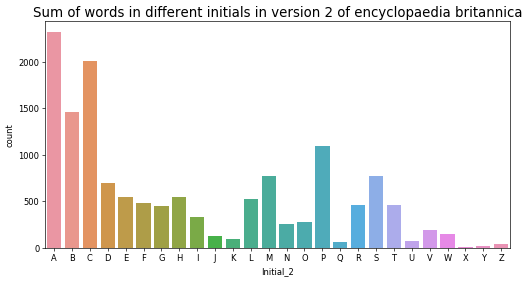

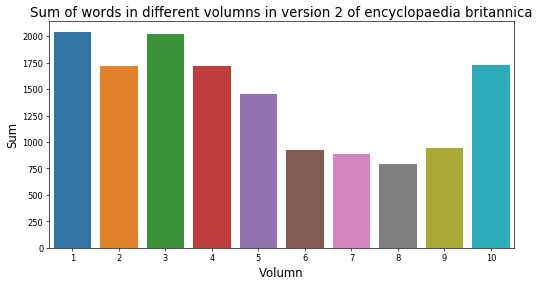

In [77]:
plt.figure(figsize=[10,5],dpi=60)
sns.countplot(x='Initial_2',data=version2)
plt.title("Sum of words in different initials in version 2 of encyclopaedia britannica",fontsize=16)
#bar chart of sum of words in different initial s in single version 2.
plt.figure(figsize=[10,5],dpi=60)
sns.countplot(x="BOOKNUM",data=version2)
plt.xlabel("Volumn",fontsize=14)
plt.ylabel("Sum",fontsize=14)
plt.title("Sum of words in different volumns in version 2 of encyclopaedia britannica",fontsize=16)
# create a list with 26 initial words




After analyzing the version 2 , I wonder if it is the general distribution ,or there are some differences for version 3 to 5.
Plus,If the words' numbers keep increasing by initials as well?
So I use a multiple bar chart to show all the distribution of words'numbers by alphabet index in version 2 to version 5.


it is illustrated vividly that words with "A" initial are always have the most numbers overall ,and it decreases gradually from A to Z.
Also,for A,it is increased from version 2 to version 5.
But for the words with other initials, it might be fluctuated.


In [161]:
initialcharacters='A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'
#set a array with 26 alphabet
plt.figure(figsize=[15,10],dpi=60)#set the size of the figure
bar_disAlphabet=Bar()
#create a bar chart
bar_disAlphabet.add_xaxis(initialcharacters)
#add x axis
bar_disAlphabet.add_yaxis("Version2",list(version2['Initial_2'].value_counts()))
bar_disAlphabet.add_yaxis("Version3",list(version3['Initial_3'].value_counts()))
bar_disAlphabet.add_yaxis("Version4",list(version4['Initial_4'].value_counts()))
bar_disAlphabet.add_yaxis("Version5",list(version5['Initial_5'].value_counts()))
#add the data from version2 to 5
bar_disAlphabet.set_global_opts(title_opts=opts.TitleOpts(title="Distribution of Alpha Index"))
#set title
bar_disAlphabet.render_notebook()
#show on the screen

<Figure size 900x600 with 0 Axes>

Then I decide to make a donut chart which can see the distribution easily.


it shows that for words with "A","B","C","D" initials covered a half of the total data ,which means that over 50% pecentage of numbers of words' initials are these four.Then for "E" to "N",it's range from 3% to 5%.

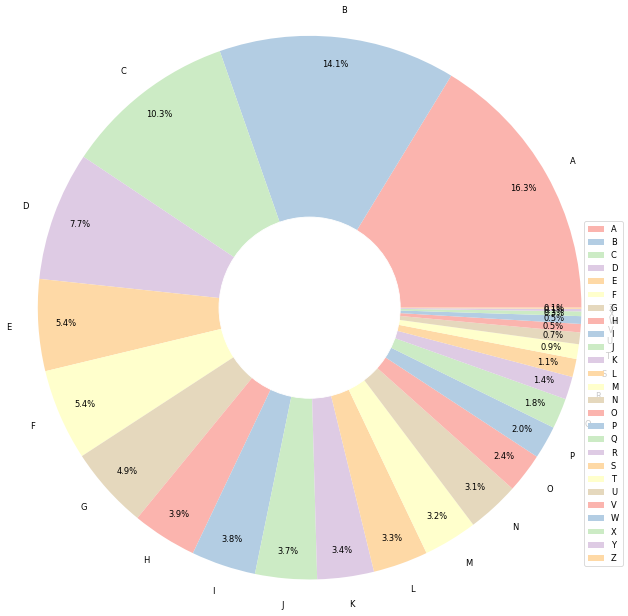

In [79]:
white_circle=plt.Circle( (0,0),1, color='white')
#create white circle for the center
plt.figure(figsize=[10,5],dpi=60)
#set the size of figure
plt.pie(version2['Initial_2'].value_counts(), labels=initialcharacters,radius=3,labeldistance = 1.1, colors=Pastel1_7.hex_colors,autopct='%1.1f%%',pctdistance = 0.9)
p=plt.gcf()
p.gca().add_artist(white_circle)
plt.legend(loc='best', bbox_to_anchor=(1.4, 0.4, 0.5, 0.5))
plt.show()


Import nltk package for words tagging with nltk

Here is POS tag list:

* CC	coordinating conjunction
* CD	cardinal digit
* DT	determiner
* EX	existential there (like: "there is" ... think of it like "there exists")
* FW	foreign word
* IN	preposition/subordinating conjunction
* JJ	adjective	'big'
* JJR	adjective, comparative	'bigger'
* JJS	adjective, superlative	'biggest'
* LS	list marker	1)
* MD	modal	could, will
* NN	noun, singular 'desk'
* NNS	noun plural	'desks'
* NNP	proper noun, singular	'Harrison'
* NNPS	proper noun, plural	'Americans'
* PDT	predeterminer	'all the kids'
* POS	possessive ending	parent\'s
* PRP	personal pronoun	I, he, she
* RB	adverb	very, silently,
* RBR	adverb, comparative	better
* RBS	adverb, superlative	best
* RP	particle	give up
* TO	to	go 'to' the store.
* UH	interjection	errrrrrrrm
* VB	verb, base form	take
* VBD	verb, past tense	took
* VBG	verb, gerund/present participle	taking
* VBN	verb, past participle	taken
* VBP	verb, sing. present, non-3d	take
* VBZ	verb, 3rd person sing. present	takes
* WDT	wh-determiner	which
* WP	wh-pronoun	who, what
* WRB	wh-abverb	where, when

use pos.tag catogorize data from version2 to version5

In [171]:
from nltk.stem.porter import PorterStemmer  
from nltk.tokenize import TweetTokenizer

In [113]:
porter_stemmer = PorterStemmer() 
tknzr = TweetTokenizer() 


m=" "
m=m.join(list(version2['CONTENT']))
word_class = nltk.pos_tag(tknzr.tokenize(m.lower()))
wordclassdf_v2=pd.DataFrame(word_class,columns=['words','class1'])
#wordclassdf_v2['value']=1
w1=wordclassdf_v2["class1"].value_counts()

m=" "
m=m.join(list(version3['CONTENT']))
word_class = nltk.pos_tag(tknzr.tokenize(m.lower()))
wordclassdf_v3=pd.DataFrame(word_class,columns=['words','class2'])
#wordclassdf_v3['value']=1
w2=wordclassdf_v3["class2"].value_counts()

m=" "
m=m.join(list(version4['CONTENT']))
word_class = nltk.pos_tag(tknzr.tokenize(m.lower()))
wordclassdf_v4=pd.DataFrame(word_class,columns=['words','class3'])
#wordclassdf_v3['value']=1
w3=wordclassdf_v4["class3"].value_counts()

m=" "
m=m.join(list(version4['CONTENT']))
word_class = nltk.pos_tag(tknzr.tokenize(m.lower()))
wordclassdf_v5=pd.DataFrame(word_class,columns=['words','class4'])
#wordclassdf_v3['value']=1
w4=wordclassdf_v5["class4"].value_counts()


In [172]:
df_class=pd.DataFrame([w1,w2,w3,w4]).T
df_class
#show the data categorized in version2 to version5

class1  class2   class3   class4
NN    8529.0  9250.0  10019.0  10019.0
JJ    2384.0  2567.0   2676.0   2676.0
NNS   1076.0  1161.0   1258.0   1258.0
VBP    893.0   972.0   1064.0   1064.0
VBG    285.0   289.0    285.0    285.0
VBZ    274.0   285.0    322.0    322.0
IN     176.0   202.0    207.0    207.0
VBD    161.0   177.0    184.0    184.0
RB     157.0   168.0    188.0    188.0
FW      74.0    80.0     92.0     92.0
NNP     55.0    69.0     61.0     61.0
VB      36.0    41.0     48.0     48.0
VBN     28.0    27.0     40.0     40.0
JJR     24.0    25.0     31.0     31.0
CC      22.0    22.0     32.0     32.0
JJS     13.0    13.0     14.0     14.0
RBR     10.0    10.0     14.0     14.0
DT       8.0    12.0     15.0     15.0
RP       8.0     1.0      2.0      2.0
MD       4.0     5.0      7.0      7.0
CD       3.0     4.0      3.0      3.0
WRB      2.0     NaN      1.0      1.0
PRP      2.0     3.0      2.0      2.0
WP       1.0     1.0      NaN      NaN
PRP$     1.0     2.0      4.0      4.0
RBS      1.0     NaN      2.0      2.0
PDT      1.0     1.0      1.0      1.0
POS      1.0     1.0      4.0      4.0
WDT      NaN     1.0      NaN      NaN
UH       NaN     1.0      NaN      NaN
NNPS     NaN     NaN      1.0      1.0

Visualization this words tagging with nltk in version2


shown in the donut chart ,NN is the most size of tag (59.9%) totally.Then is JJ and NNS which has 16.8% and 7.6% separately.

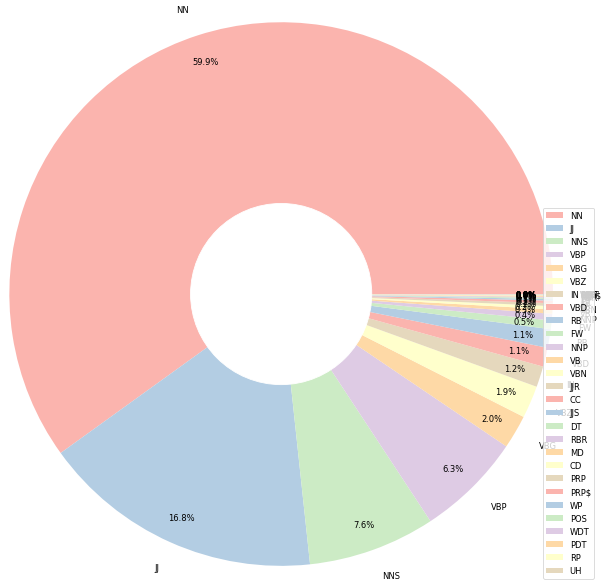

In [95]:
my_circle=plt.Circle( (0,0),1, color='white')#set the center white circle
plt.figure(figsize=[10,5],dpi=60)#set the whole figure size
plt.pie(w1, labels=w2.index,radius=3,labeldistance = 1.1, colors=Pastel1_7.hex_colors,autopct='%1.1f%%',pctdistance = 0.9)
#make the pie chart
p=plt.gcf()
p.gca().add_artist(my_circle)#add the center circle
plt.legend(loc='best', bbox_to_anchor=(1.4, 0.4, 0.5, 0.5))#set the label list location
plt.show()


the line chart shows that the trends from version 2 to version 5 are similar extremely.

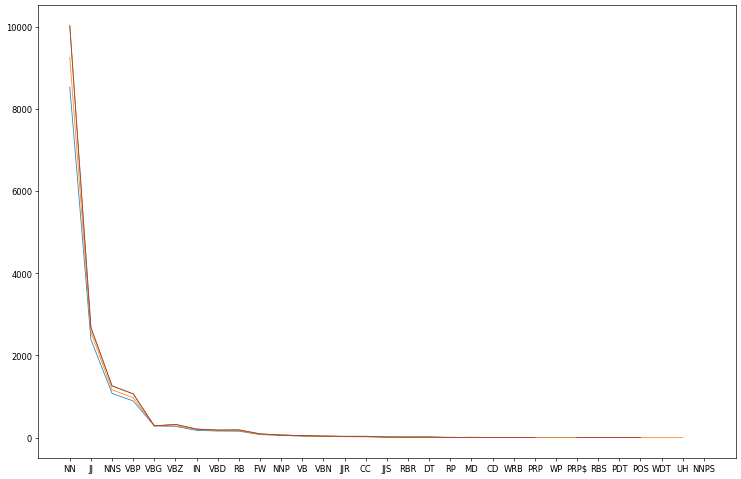

In [174]:
plt.figure(figsize=[15,10],dpi=60)#set size of the line chart
plt.plot(df.index, df['class1'], marker='', linewidth=1, alpha=0.9, label=df.index)
plt.plot(df.index, df['class2'], marker='',  linewidth=1, alpha=0.9, label=df.index) 
plt.plot(df.index, df['class3'], marker='', linewidth=1, alpha=0.9, label=df.index)
plt.plot(df.index, df['class4'], marker='',  linewidth=1, alpha=0.9, label=df.index)
#add four lines in the chart

Using wordcloud to give a more vivid figure.


By this figure,"NN","JJ" are the most two size of all.

(-0.5, 1499.5, 1499.5, -0.5)

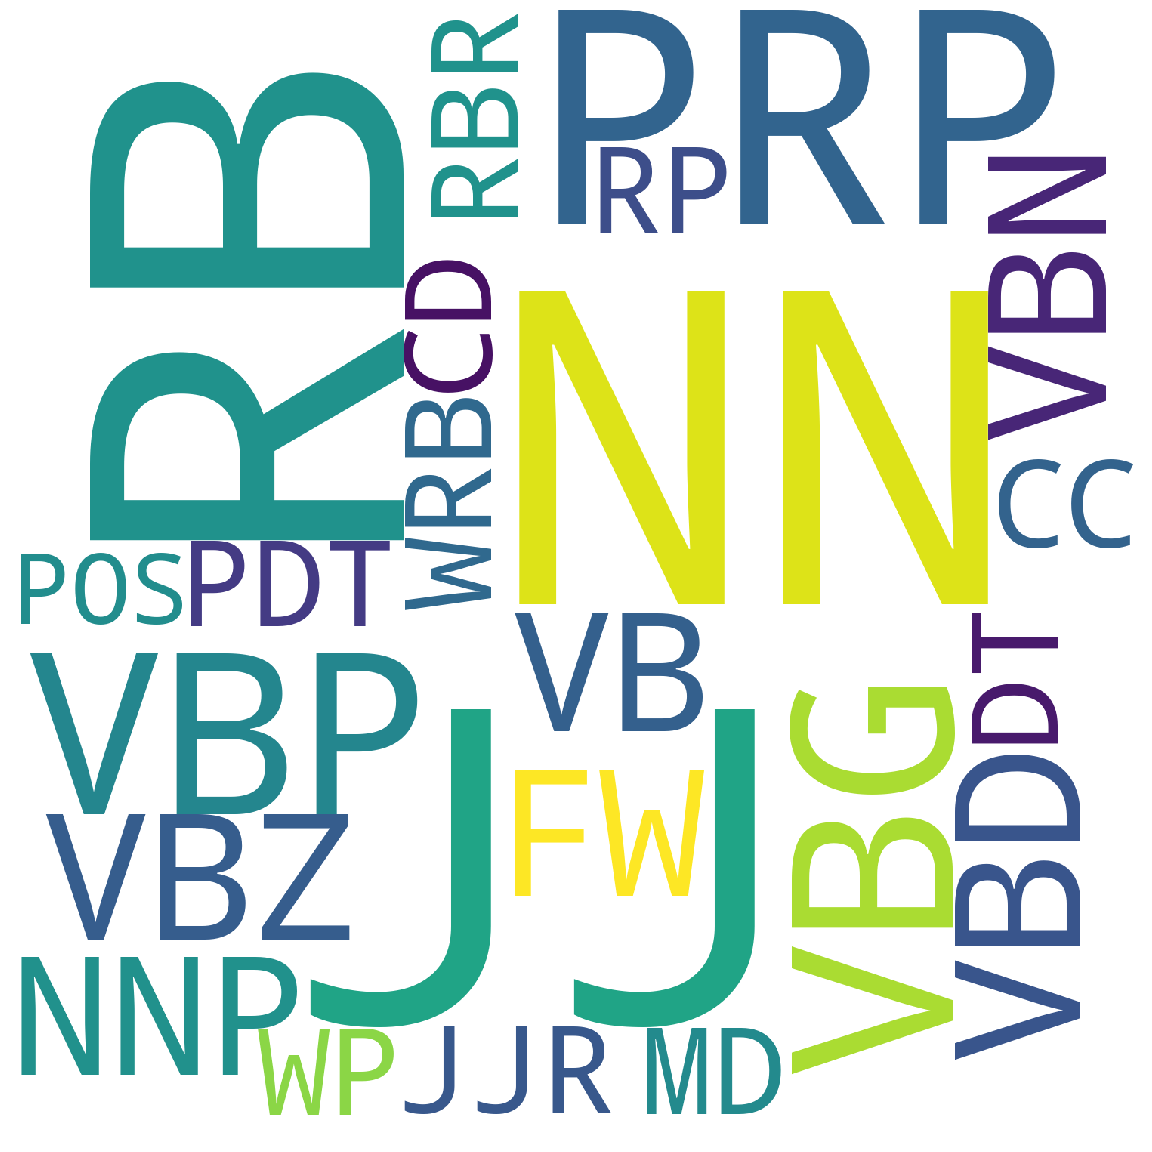

In [175]:
from wordcloud import WordCloud
plt.figure(figsize=(15, 15), dpi= 100)#set the size of figure
#use wordcloud function
wordcloud = WordCloud(
                        background_color='white',
                        width=1500,
                        height=1500
                         ).generate(str(df['class1'].dropna()).rstrip('Name: class1, dtype: float64'))#drop the type info
plt.imshow(wordcloud)#show the wordcloud
plt.axis('off')

# Reflection
### Conclusion
Totally, the data kept increasing both in the whole and seperately when version was being updated.
for words tagging with initials, the words whose initials are "A-D" are the most.
for words tagging with nltk, the words whose initials are noun are the most.

### Hypothesis
 
 
After searching the version 1 to version 8,
- the total words' number might be increased gradually
    because the version from 2 to 5 shows a gradual increase.
- maybe the words which are noun will increase stably 
  just like the increasing rate between version 2 and 5.
- the words who has rare initials might be less used or be intergrated to other similar words.
  (based on the figure shown that the trends of words tagging with initials , some numbers of the words in specific initials decreased or fluctuated )
- There may be a difference in the number of word classes in the overall growth trend. But the overall proportion may still be the same as now, noun and the initials are "a, b, c, d" occupy the majority. 


by checking the data in version1 and 6 to 8 and using nltk to analyze the words in encyclopaedia britannica